In [2]:
# Artificial Neural Network


# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
# Importing the dataset
from google.colab import files


uploaded = files.upload()


Saving Churn_Modelling.csv to Churn_Modelling.csv


In [4]:
import pandas as pd
import io

dataset= pd.read_csv(io.BytesIO(uploaded['Churn_Modelling.csv']))
print(dataset)

X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]


      RowNumber  CustomerId    Surname  ...  IsActiveMember EstimatedSalary Exited
0             1    15634602   Hargrave  ...               1       101348.88      1
1             2    15647311       Hill  ...               1       112542.58      0
2             3    15619304       Onio  ...               0       113931.57      1
3             4    15701354       Boni  ...               0        93826.63      0
4             5    15737888   Mitchell  ...               1        79084.10      0
...         ...         ...        ...  ...             ...             ...    ...
9995       9996    15606229   Obijiaku  ...               0        96270.64      0
9996       9997    15569892  Johnstone  ...               1       101699.77      0
9997       9998    15584532        Liu  ...               1        42085.58      1
9998       9999    15682355  Sabbatini  ...               0        92888.52      1
9999      10000    15628319     Walker  ...               0        38190.78      0

[10

In [5]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)


In [6]:
## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [7]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:

# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [9]:
# Initialising the ANN
classifier = Sequential()

In [10]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(6,activation='relu',kernel_initializer='he_uniform',))

In [11]:

# Adding the second hidden layer
classifier.add(Dense(6,activation='relu',kernel_initializer='he_uniform'))
# Adding the output layer
classifier.add(Dense(1,kernel_initializer='glorot_uniform',activation ='sigmoid'))
# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10,epochs= 100)

Epoch 1/100
536/536 [==============================] - 2s 3ms/step - loss: 0.5938 - accuracy: 0.7162 - val_loss: 0.5201 - val_accuracy: 0.7952
Epoch 2/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4987 - accuracy: 0.7962 - val_loss: 0.4908 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4798 - accuracy: 0.7962 - val_loss: 0.4781 - val_accuracy: 0.7955
Epoch 4/100
536/536 [==============================] - 3s 6ms/step - loss: 0.4691 - accuracy: 0.7962 - val_loss: 0.4694 - val_accuracy: 0.7955
Epoch 5/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4614 - accuracy: 0.7962 - val_loss: 0.4630 - val_accuracy: 0.7955
Epoch 6/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4556 - accuracy: 0.7962 - val_loss: 0.4580 - val_accuracy: 0.7955
Epoch 7/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4508 - accuracy: 0.7962 - val_loss: 0.4537 - val_accuracy: 0.7955

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


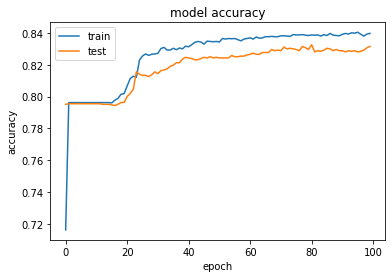

In [12]:
# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

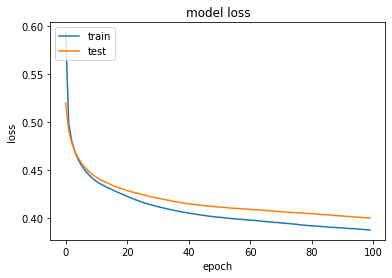

In [13]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:

# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.8355